In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

In [ ]:
plastic = pd.read_csv("plastics.csv")
p_len=len(plastic)
plastic.isna().sum()
print(plastic.shape)
plastic.info()

(13380, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13380 entries, 0 to 13379
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         13380 non-null  object 
 1   year            13380 non-null  int64  
 2   parent_company  13329 non-null  object 
 3   empty           10137 non-null  float64
 4   hdpe            11734 non-null  float64
 5   ldpe            11303 non-null  float64
 6   o               13113 non-null  float64
 7   pet             13166 non-null  float64
 8   pp              11884 non-null  float64
 9   ps              11408 non-null  float64
 10  pvc             9052 non-null   float64
 11  grand_total     13366 non-null  float64
 12  num_events      13380 non-null  int64  
 13  volunteers      13273 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 1.4+ MB


In [ ]:
# force types to be the same, exception, year remains an int
plastic["parent_company"] = plastic["parent_company"].astype(str)
plastic["country"] = plastic["country"].astype(str)
plastic.country = plastic.country.str.replace(' ', '_')
plastic.parent_company = plastic.parent_company.str.replace(' ', '_')
plastic.country = plastic.country.str.replace('__', '_')
plastic["num_events"] = plastic["num_events"].astype(float)
# United Kingdom included twice, we will combine these into one since we know the UK includes Northern Ireland and we want this to be one value
plastic.country = plastic.country.str.replace('United_Kingdom_of_Great_Britain_&_Northern_Ireland', 'United_Kingdom')
# Reformatting country names so they are consistent with our current naming conventions
plastic.country = plastic.country.str.replace('ECUADOR', 'Ecuador')
plastic.country = plastic.country.str.replace('NIGERIA', 'Nigeria')
plastic.country = plastic.country.str.replace('Taiwan_Republic_of_China_(ROC)', 'Taiwan')
# Country encoded as NONE we will be dropping since location is important in our analysis
plastic = plastic[plastic["country"] != "EMPTY"]
plastic = plastic[plastic["parent_company"] != "Grand_Total"]
plastic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11983 entries, 1 to 13379
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         11983 non-null  object 
 1   year            11983 non-null  int64  
 2   parent_company  11983 non-null  object 
 3   empty           10103 non-null  float64
 4   hdpe            10364 non-null  float64
 5   ldpe            9938 non-null   float64
 6   o               11729 non-null  float64
 7   pet             11777 non-null  float64
 8   pp              10515 non-null  float64
 9   ps              10043 non-null  float64
 10  pvc             7694 non-null   float64
 11  grand_total     11969 non-null  float64
 12  num_events      11983 non-null  float64
 13  volunteers      11876 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 1.4+ MB


<ipython-input-4-c8a707314f9c>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  plastic.country = plastic.country.str.replace('Taiwan_Republic_of_China_(ROC)', 'Taiwan')


In [ ]:
##cleaning
plastic.isna().sum()

#using functions to find percentage of nas
def get_proportion_null(df):
  return df.isna().sum()/len(df)

get_proportion_null(plastic)

# Highest proportion NAs is 32.34%, not enough to drop the column


country           0.000000
year              0.000000
parent_company    0.000000
empty             0.156889
hdpe              0.135108
ldpe              0.170658
o                 0.021197
pet               0.017191
pp                0.122507
ps                0.161896
pvc               0.357924
grand_total       0.001168
num_events        0.000000
volunteers        0.008929
dtype: float64

Since we do not have any columns with null values greater than 80%, we should not drop any columns since they are all workable.
Experimental continuation: Create one df with null values dropped from the entire data frame, and run EDA to see how our visualization works. If we lost too much data, we should come back and find a better way to fill missing values without drastically altering our data.

In [ ]:
plastic_drop= plastic.dropna()
#check that the na values are truly gone
plastic_drop.isna().sum()
#check how many values we dropped, from initial count we had 13380 observations
p_len-len(plastic_drop)
#we now have 6776 values, this reduced our dataframe by 6604 observations, thus we should take more care cleaning

6560

Since we dropped over half of our data when removing NAs, we want to find reasonable values to fill in our NAs instead of just dropping them. Our first experiment will fill them with the median. In case any of our data is skewed, this will be more robust to the skewness of our data.

In [ ]:
#Fill NAs with median
#since our values are numerical, we should fill them with median or mean, in this cell, we will be filling with median
# We will be filling any cols with >1000 missing values, then dropping the remaining
med_plastic = plastic.copy()
med_plastic=med_plastic.fillna(med_plastic.median())
med_plastic=med_plastic.dropna()

<ipython-input-7-a5214c0067d2>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med_plastic=med_plastic.fillna(med_plastic.median())


In [ ]:
#fill with mean
#since we are using mean we will make a function to make our code more reproducible
def mean_fill(df):
  mean_df = df.copy()
  mean_df = mean_df.fillna(df.mean())
  return mean_df

mean_plastic = plastic.copy()
mean_plastic = mean_fill(mean_plastic)
mean_plastic = mean_plastic.dropna()

<ipython-input-8-866e9362f770>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_df = mean_df.fillna(df.mean())


to see how filling these values impacts our data, we will do EDA on the dataset with NAs remove and compare it to the prior methods.

In [ ]:
#compare summary statistics to original data
plastic.describe()

,year,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
count,11983.000000,10103.000000,10364.000000,9938.000000,11729.000000,11777.000000,10515.000000,10043.000000,7694.000000,11969.000000,11983.000000,11876.000000
mean,2019.340816,0.413145,2.401293,7.104850,30.806804,14.240893,7.064955,1.319526,0.325448,60.052636,20.944672,1082.666723
std,0.474003,22.624030,55.378741,116.444682,1182.973321,252.592182,132.816607,28.689767,8.121359,1275.989503,25.964317,1890.422384
min,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,114.000000
50%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,387.000000
75%,2020.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,32.000000,1439.000000
max,2020.000000,2208.000000,3209.000000,6358.000000,120632.000000,17634.000000,6046.000000,1390.000000,622.000000,120632.000000,134.000000,31318.000000


In [ ]:
plastic_drop.describe()

,year,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
count,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000,6820.000000
mean,2019.581085,0.611437,3.328739,9.286950,27.837097,19.226833,9.612170,1.786070,0.355279,72.045015,24.119355,1476.865249
std,0.493418,27.534565,67.975912,138.079275,496.236630,319.936817,160.320285,34.659204,8.603554,826.462700,30.475194,2063.864480
min,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,190.000000
50%,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,17.000000,400.000000
75%,2020.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,8.000000,32.000000,2099.000000
max,2020.000000,2208.000000,3209.000000,6358.000000,26705.000000,17634.000000,6046.000000,1390.000000,622.000000,31331.000000,134.000000,6850.000000


In [ ]:
mean_plastic.describe()

,year,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
count,11983.000000,11983.000000,11983.000000,11983.000000,11983.000000,11983.000000,11983.000000,11983.000000,11983.000000,11983.000000,11983.000000,11983.000000
mean,2019.340816,0.413145,2.401293,7.104850,30.806804,14.240893,7.064955,1.319526,0.325448,60.052636,20.944672,1082.666723
std,0.474003,20.773467,51.501653,106.043156,1170.367549,250.411429,124.414704,26.264702,6.507466,1275.243839,25.964317,1881.962661
min,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,114.000000
50%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,387.000000
75%,2020.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.325448,5.000000,32.000000,1439.000000
max,2020.000000,2208.000000,3209.000000,6358.000000,120632.000000,17634.000000,6046.000000,1390.000000,622.000000,120632.000000,134.000000,31318.000000


In [ ]:
med_plastic.describe()
# frequency table of countries
# function create dictionary of country frequencies
def country_freq(df):
  dic = {}
  for i in df["country"]:
    if i not in dic:
      dic[i]=1
    else:
      dic[i]+=1
  return dic
country = country_freq(mean_plastic)
country

{'Argentina': 500,
 'Australia': 70,
 'Bangladesh': 167,
 'Benin': 3,
 'Bhutan': 4,
 'Brazil': 155,
 'Bulgaria': 51,
 'Burkina_Faso': 41,
 'Cameroon': 151,
 'Canada': 68,
 'China': 837,
 'Colombia': 26,
 'Cote_D_ivoire': 1,
 'Cyprus': 48,
 'Ecuador': 60,
 'France': 44,
 'Germany': 26,
 'Ghana': 54,
 'Hong_Kong': 557,
 'India': 556,
 'Indonesia': 929,
 'Ireland': 31,
 'Italy': 158,
 'Japan': 215,
 'Kenya': 143,
 'Latvia': 203,
 'Luxembourg': 1,
 'Malaysia': 268,
 'Maldives': 7,
 'Mexico': 326,
 'Montenegro': 32,
 'Nigeria': 688,
 'Netherlands': 116,
 'Philippines': 830,
 'Portugal': 91,
 'Rwanda': 16,
 'Slovenia': 205,
 'South_Africa': 45,
 'Spain': 129,
 'Sri_Lanka': 100,
 'Switzerland': 359,
 'Taiwan_Republic_of_China_(ROC)': 10,
 'Tanzania': 162,
 'Thailand': 193,
 'Tunisia': 17,
 'Turkey': 97,
 'Ukraine': 828,
 'United_Arab_Emirates': 3,
 'United_Kingdom': 84,
 'United_States_of_America': 958,
 'Vietnam': 805,
 'Armenia': 2,
 'Chile': 121,
 'Denmark': 182,
 'El_Salvador': 5,
 'Greec

Looking at the summary statistics from each data frame, I believe using the mean will be the best method, since it preserves the most information from the original data. We may circle back and drop more NA values if our analysis provides abnormal results, however, I believe proceeding with the df with NAs filled as the mean will give us results closest to our original df. However, note this point forward is using an altered data frame.

In [ ]:
mean_plastic.corr()
#grand total and o (other) have the highest correlation of 0.944, something to note prior to proceeding. Note, grand_total denotes total plastic of all types.
# may imply a good amount of plastic recorded falls into the other category
# ldpe, hdpe, and pet also may have some relation worth exploring, correlation 0.6-0.68, not concerning just something to note
#aggregation: Compare companies with most grand total plastic and least differing in years
mean_plastic[mean_plastic["grand_total"]==mean_plastic["grand_total"].max()]

<ipython-input-13-1c3fd2899e4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_plastic.corr()


,country,year,parent_company,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
7059,Taiwan_Republic_of_China_(ROC),2019,Unbranded,0.0,2.401293,7.10485,120632.0,14.240893,7.064955,1.319526,0.325448,120632.0,2.0,31318.0


In [ ]:
max_df = mean_plastic[mean_plastic["grand_total"] > mean_plastic["grand_total"].quantile(q=0.75)]
max_df.describe()
max_countries = country_freq(max_df)
max_df.parent_company.value_counts()

Unbranded                76
The_Coca-Cola_Company    71
nan                      48
Unilever                 37
Pepsico                  34
                         ..
Net                       1
Choice_Tomatoes           1
La_Casera                 1
Fayrous_Drink             1
Vinamilk                  1
Name: parent_company, Length: 2064, dtype: int64

In [ ]:
min_df = mean_plastic[mean_plastic["grand_total"]==mean_plastic["grand_total"].min()]
min_df.describe()
min_countries = country_freq(min_df)

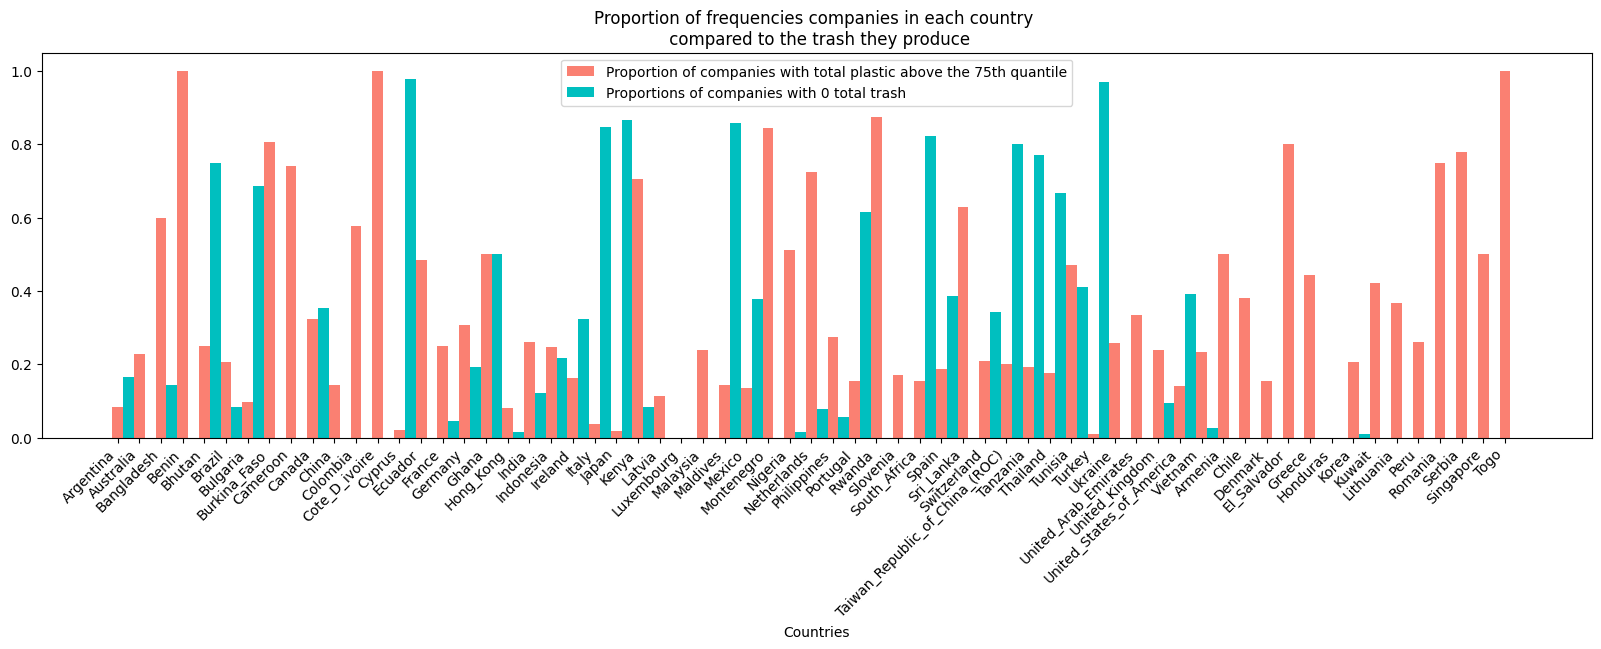

<Figure size 640x480 with 0 Axes>

In [ ]:
# get proportion of countries to countries appearing in max and min values for trash
max_country_prop = {}
# color pallette
cols = ["palegreen", "peachpuff", "salmon"]

for i in country:
  if i not in max_country_prop and i not in max_countries:
    max_country_prop[i]=0
  else:
    max_country_prop[i]= max_countries[i]/country[i]
max_country_prop

# get min country proportion
min_country_prop = {}
for i in country:
  if i not in min_country_prop and i not in min_countries:
    min_country_prop[i]=0
  else:
    min_country_prop[i]= min_countries[i]/country[i]
min_country_prop

# Extracting country names and respective proportions from dictionaries by converting them to lists
countries = list(max_country_prop.keys())
tot_freq = list(country.values())
max_props = list(max_country_prop.values())
min_props = list(min_country_prop.values())

bar_width = 0.5
index = np.arange(len(countries))

# Creating the bar plot
plt.figure(figsize=(20, 5))
#plt.bar(index, tot_freq, width = bar_width, label='Total frequency')
plt.bar(index, max_props, width=bar_width, label='Proportion of companies with total plastic above the 75th quantile', color = "salmon")
plt.bar(index +bar_width, min_props, width=bar_width, label='Proportions of companies with 0 total trash', color = "c")
# Customizing the plot
plt.xlabel('Countries')
plt.xticks(range(len(countries)), countries, fontsize=10)
plt.xticks(rotation=45, ha="right")
plt.title('Proportion of frequencies companies in each country \n compared to the trash they produce')
plt.legend()

# Displaying the plot
plt.show()
plt.savefig("prop_freq.png")
#this graph also shows us an inconsistency in naming conventions with our countries, thus we should return to our cleaning and fix them such that countries with spaces in their names follow the same naming conventions.

This display shows us the proportion of companies from each country that fall into the top 75th percentile of grand total trash and the minimum value of trash production, which was 0. This proportion is calculated by taking the frequency of companies frome ach country falling into each category and dividing it by the total frequency of companies in our data set from each country. From this we are also able to see certain countries have proportions close to one for one category, this implies some companies in given countries mostly fall into the highest trash producers or the lowest trash producers.

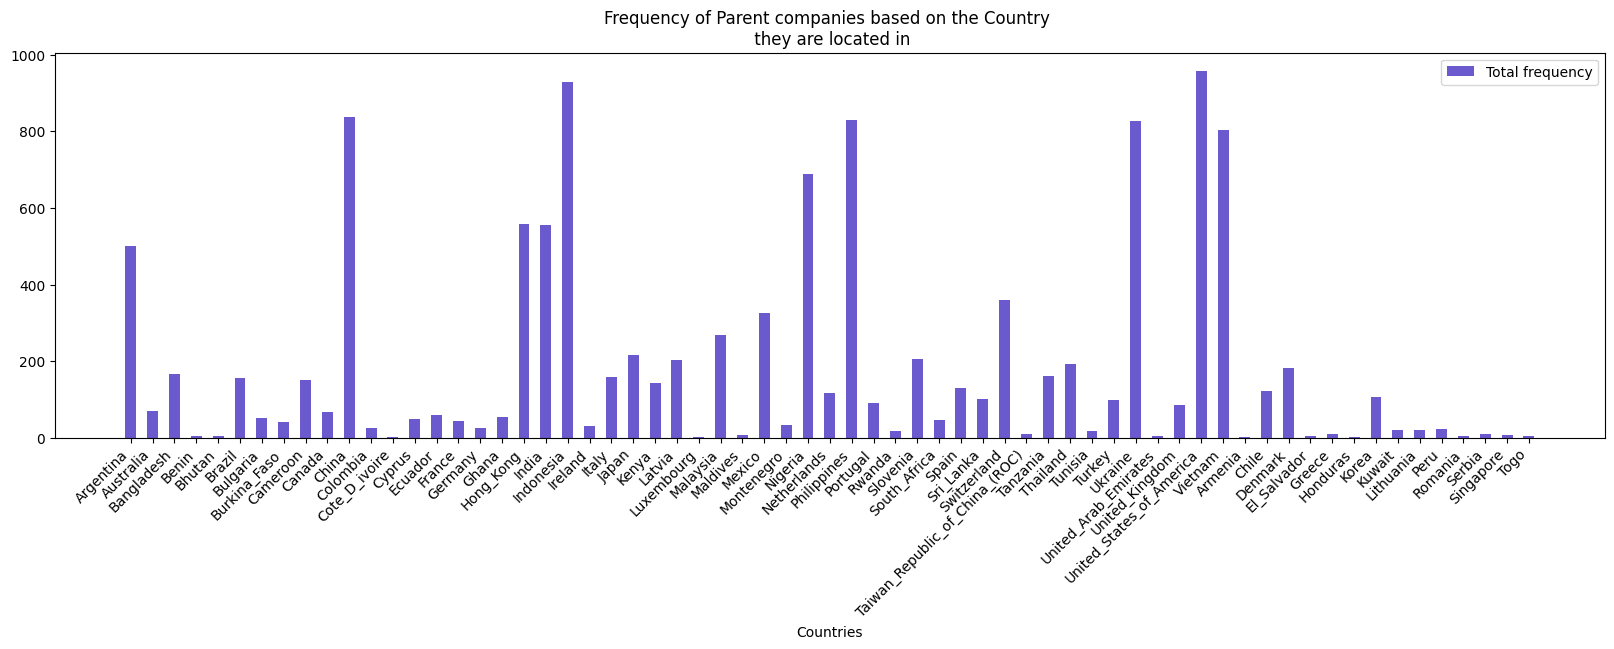

In [ ]:
# We are going to graph the country frequency, if there are less companies in a country it will augment our data
countries = list(country.keys())
tot_freq = list(country.values())

bar_width = 0.5
index = np.arange(len(countries))

# Creating the bar plot
plt.figure(figsize=(20, 5))
plt.bar(index, tot_freq, width = bar_width, label='Total frequency', color = "slateblue")
# Customizing the plot
plt.xlabel('Countries')
plt.xticks(range(len(countries)), countries, fontsize=10)
plt.xticks(rotation=45, ha="right")
plt.title('Frequency of Parent companies based on the Country \n they are located in')
plt.legend()

# Displaying the plot
plt.show()


For this analysis, we will be focusing on countries that have more than 200 parent companies operating out of them. Since comparing countries with less than 200 companies operating will be unfair, automatically countries with a higher frequency of companies will have a disproportianately higher total plastic production. Continuing we will make a new subset of our data set, with countries that have more than a hundred total parent companies in operation. We will proceed by investigating the types of plastic these companies produce. We will compare plastic based on how easily it can be recycled.

In [ ]:
#We will be using a copy of our data set with missing values filled with the mean, since we do not want to augment the original data frame.
gr_plastic= mean_plastic.copy()
plastic_20 = gr_plastic[gr_plastic["year"] == 2020]
plastic_19 = gr_plastic[gr_plastic["year"] == 2019]
# we still want a table summing the occurrences of each country in our data frame according to parent company location
# We will make a knew frequency table of countries separated by year
freq_19 = country_freq(plastic_19)
freq_20 = country_freq(plastic_20)
# since we want to sum the numerics, we will drop parent company and year from these data frames
# We already separated our df by year, thus we are only analyzing information based on country and plastic totals

#dropping year and parent company
plastic_20 = plastic_20.drop(columns=['year', 'parent_company'])
plastic_19 = plastic_19.drop(columns=['year', 'parent_company'])

# summing numericals based on countries
plastic_20 = plastic_20.groupby(["country"]).sum().reset_index()
plastic_19 = plastic_19.groupby(["country"]).sum().reset_index()
plastic_20["freq"] = freq_20.values()
plastic_19["freq"] = freq_19.values()

We will now separate the plastic types based on how easy they are to recycle. While plastic pollution is a large problem, it is much easier to address with recycling, however, there are many types of plastic in circulation that cannot be recycled and are harmful to our environment. Thus we will continue now by examining the types of plastic we have to deal with. We will be comparing trends by the years 2019 and 2020.


---
First we will examine the types of plastic in total that circulate. Note, many values were filled with the mean, thus our data may not be truly reflective of each country, this is merely meant to explore trends. Do to missing values, we had to use the mean value to continue with analysis without losing too much data. Using the mean preserved the most information based on the original data, thus we are proceeding with heavily edited data as stated prior.


In [ ]:
# Recode a categorical variable that separates by how easy it is to recycle total plastic

# ENCODING: Easy
# PET, picked up through most recycling programs
# PP, picked up through most recycling programs
# HDPE, Picked up through most recycling programs

# ENCODING: Moderate
# PS, often not picked up through recycling programs
# PVC, Too long life for significant recycling volumes, can be recycled into vinyl
# O, not typically recycled

# ENCODING: Hard
# LDPE, not often recycled, significant source pollution

plastic_enc20 = plastic_20.copy()
plastic_enc20["easy"] = plastic_20["pet"]+plastic_20["pp"]+plastic_20["hdpe"]
plastic_enc20["medium"] = plastic_20["ps"]+plastic_20["pvc"]+plastic_20["o"]
plastic_enc20["hard"] = plastic_20["ldpe"]

plastic_enc19 = plastic_19.copy()
plastic_enc19["easy"] = plastic_enc19["pet"]+plastic_19["pp"]+plastic_19["hdpe"]
plastic_enc19["medium"] = plastic_19["ps"]+plastic_19["pvc"]+plastic_19["o"]
plastic_enc19["hard"] = plastic_19["ldpe"]

#encoding variable into data frame
mean_plastic["easy"] = mean_plastic["pet"]+mean_plastic["pp"]+mean_plastic["hdpe"]
mean_plastic["medium"] = mean_plastic["ps"]+mean_plastic["pvc"]+mean_plastic["o"]
mean_plastic["hard"] = mean_plastic["ldpe"]

mean_plastic

,country,year,parent_company,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers,easy,medium,hard
1,Argentina,2019,Unbranded,0.0,155.0,50.0,532.0,848.0,122.0,114.0,17.0,1838.0,4.0,243.0,1125.0,663.0,50.0
2,Argentina,2019,The_Coca-Cola_Company,0.0,0.0,0.0,0.0,222.0,35.0,0.0,0.0,257.0,4.0,243.0,257.0,0.0,0.0
3,Argentina,2019,Secco,0.0,0.0,0.0,0.0,39.0,4.0,0.0,0.0,43.0,4.0,243.0,43.0,0.0,0.0
4,Argentina,2019,Doble_Cola,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,38.0,4.0,243.0,38.0,0.0,0.0
5,Argentina,2019,Pritty,0.0,0.0,0.0,0.0,22.0,7.0,0.0,0.0,29.0,4.0,243.0,29.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13375,Vietnam,2020,Vinamilk,0.0,0.0,0.0,91.0,1.0,0.0,0.0,0.0,92.0,6.0,27.0,1.0,91.0,0.0
13376,Vietnam,2020,VINH_HAO_CO.,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,6.0,27.0,4.0,0.0,0.0
13377,Vietnam,2020,Vital,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,6.0,27.0,4.0,0.0,0.0
13378,Vietnam,2020,VM_Group,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,27.0,2.0,0.0,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Hong_Kong'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Mexico'),
  Text(7, 0, 'Netherlands'),
  Text(8, 0, 'Philippines'),
  Text(9, 0, 'Switzerland'),
  Text(10, 0, 'Ukraine'),
  Text(11, 0, 'United_States_of_America'),
  Text(12, 0, 'Vietnam')])

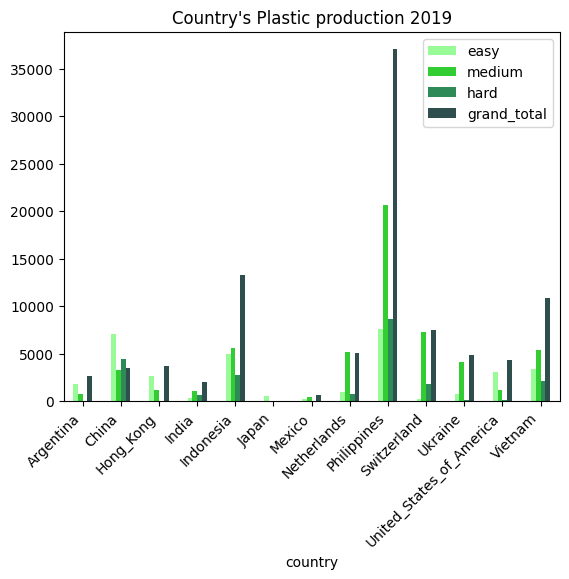

In [ ]:
# Visualizations of plastic distribution 2019
# We still want to aggregate one more time to ensure we are only looking at countries with over 400 parent companies in  operation
plastic_19_gt200 = plastic_enc19[plastic_enc19["freq"] >= 200]
cols = ["palegreen", "limegreen", "seagreen", "darkslategrey"]
plastic_19_gt200.plot(x="country", y = ["easy","medium","hard", "grand_total"],title = "Country's Plastic production 2019",color = cols, kind = "bar")
plt.xticks(rotation=45, ha="right")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'China'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Indonesia'),
  Text(4, 0, 'Malaysia'),
  Text(5, 0, 'Nigeria'),
  Text(6, 0, 'Ukraine'),
  Text(7, 0, 'United_States_of_America')])

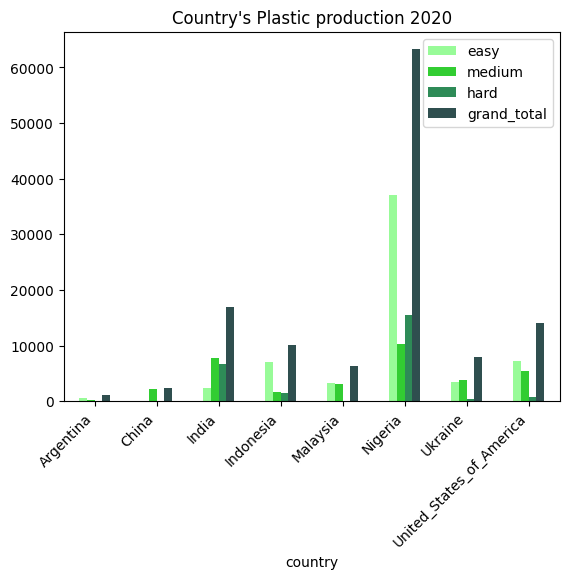

In [ ]:
plastic_20_gt200 = plastic_enc20[plastic_enc20["freq"] >= 200]
plastic_20_gt200.plot(x="country", y = ["easy","medium","hard", "grand_total"], color = cols,title = "Country's Plastic production 2020", kind = "bar")
plt.xticks(rotation=45, ha="right")

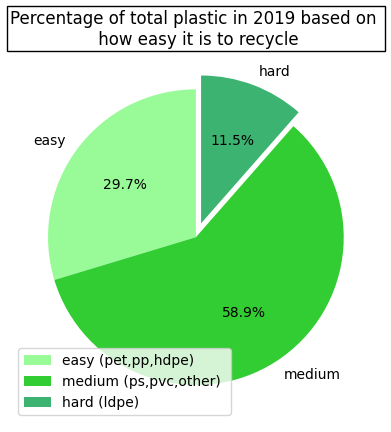

In [ ]:
# Pie chart 2019
# returns numerical percent
def perc(col,total):
  return round((col.sum()/total)*100,2)

# returns a string percent
def perc_str(perc):
  return str(perc)+"%"

# ENCODING: Easy
# PET, picked up through most recycling programs
# PP, picked up through most recycling programs
# HDPE, Picked up through most recycling programs

# ENCODING: Moderate
# PS, often not picked up through recycling programs
# PVC, Too long life for significant recycling volumes, can be recycled into vinyl
# O, not typically recycled

# ENCODING: Hard
# LDPE, not often recycled, significant source pollution

total19 = plastic_enc19.grand_total.sum()
#category percents
EASY19 = perc(plastic_enc19.easy,total19)
MEDIUM19 = perc(plastic_enc19.medium,total19)
HARD19 = perc(plastic_enc19.hard,total19)

#str categories
e19 = perc_str(EASY19)
m19 =  perc_str(MEDIUM19)
h19 = perc_str(HARD19)

plast_dist19 = np.array([EASY19,MEDIUM19,HARD19])
plast_labs19 =["easy (pet,pp,hdpe) ","medium (ps,pvc,other) ","hard (ldpe) "]
explode = (0,0,0.1)
cols = ["palegreen", "limegreen","mediumseagreen"]

fig, ax = plt.subplots()

ax.pie(plast_dist19, explode = explode, labels = ["easy", "medium", "hard"],autopct='%1.1f%%',colors = cols, startangle = 90 )
ax.legend(plast_labs19,loc = "lower left")
plt.title("Percentage of total plastic in 2019 based on \n how easy it is to recycle", bbox={'facecolor':'1', 'pad':2})
plt.show()

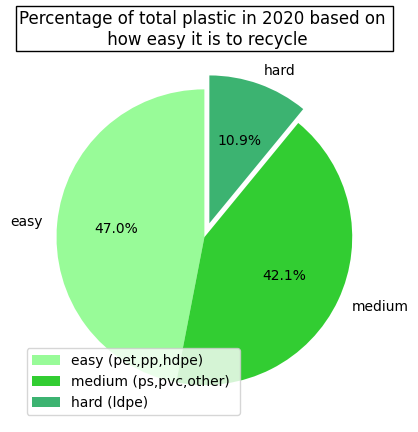

In [ ]:
# Pie chart 2020
total20 = plastic_enc20.grand_total.sum()

EASY20 = perc(plastic_enc20.easy,total20)
MEDIUM20 = perc(plastic_enc20.medium,total20)
HARD20 = perc(plastic_enc20.hard,total20)

e20 = perc_str(EASY20)
m20 = perc_str(MEDIUM20)
h20 = perc_str(HARD20)
plast_labs20 =["easy (pet,pp,hdpe) ","medium (ps,pvc,other) ","hard (ldpe) "]

plast_dist20 = np.array([EASY20,MEDIUM20,HARD20])
plt.pie(plast_dist20, explode=explode,labels = ["easy","medium","hard"],autopct='%1.1f%%',colors = cols, startangle = 90 )
plt.legend(plast_labs20,loc = "lower left")
plt.title("Percentage of total plastic in 2020 based on \n how easy it is to recycle", bbox={'facecolor':'1', 'pad':2})
plt.show()

In [ ]:
print(f"Total 19 {total19}")
print(f"Total 20 {total20}")

Total 19 372276.0
Total 20 347334.7369036678


In [ ]:
# red_plast = mean_plastic[mean_plastic["freq"]>=200]
# fig = px.histogram(red_plast,x="country",y="grand_total", color = "year", title = "Countries that produced over 5,000 units of in 2019 and 2020",barmode="group")
# fig.show()
 #df["Subjects"] = df["first_name"].map(Subjects)
#check if China is same as ROC, figure out why ROC is not represented in 2020 data
  #I think they're different...

In [ ]:
red_plast = mean_plastic[mean_plastic["grand_total"]>5000]
fig = px.histogram(red_plast,x="country",y="grand_total", color = "year", title = "Countries that produced over 5,000 units of in 2019 and 2020",barmode="group")
fig.show()
#check if China is same as ROC, figure out why ROC is not represented in 2020 data
  #I think they're different...

In [ ]:
#Investigating Taiwan_Republic_of_China_(ROC) more, data from 2019 since the 2020 data is not present
unbranded = mean_plastic[mean_plastic["parent_company"]=="Unbranded"]
fig = px.histogram(unbranded,x="country",y="grand_total", color = "year", labels = {"country":"Country","sum of grand_total":"Plastic total" },title = "Total Plastic produced by Unbranded companies in 2019 and 2020",barmode="group")
fig.show()

In [ ]:
branded = mean_plastic[mean_plastic["parent_company"]!="Unbranded"]
fig = px.histogram(branded,x="country",y="grand_total", color = "year", title = "Total plastic produced by branded companies in 2019 and 2020",barmode="group")
fig.show()

In [ ]:
from scipy import stats
branded_num = mean_plastic[mean_plastic["parent_company"]!="Unbranded"]["grand_total"]
unbranded_num = mean_plastic[mean_plastic["parent_company"]=="Unbranded"]["grand_total"]

# What I want to investigate: Unbranded companies plastic production v other companies
# Assumption: Companies that are "Unbranded" will have the highest plastic contribution, due to a lack of accountability
# too investigate this, we will add new columns to our data set

# null hypothesis: grand total plastic for branded and unbranded companies is equal
# alternate hypothesis: grand total plastic for branded and unbranded companies is not equal
t_stat, p_value = stats.ttest_ind(unbranded_num,branded_num)
# Display the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 29.289189820778343
p-value: 3.430549017488014e-182


In [ ]:
# confidence interval separated by branded vs unbranded companies
# Separate the data by gender

# Calculate point estimate
sample_mean = branded_num.mean()

# Calculate margin of error
alpha = 0.05 # significance level
df = branded_num.count() - 1 # degrees of freedom
t_crit = stats.t.ppf(1 - alpha /2 , df) # t-critical value
se = branded_num.std() / np.sqrt(branded_num.count()) # standard error
me = se * t_crit # margin of error

# Calculate confidence interval
lower_bound = sample_mean - me
upper_bound = sample_mean + me

# Display results
print("95% confidence interval for branded companies total plastic contribution is:", (lower_bound, upper_bound))

95% confidence interval for branded companies total plastic contribution is: (24.85484253620394, 39.86013131095428)


In [ ]:
# confidence interval separated by branded vs unbranded companies
# Separate the data by gender

# Calculate point estimate
sample_mean = unbranded_num.mean()

# Calculate margin of error
alpha = 0.05 # significance level
df = unbranded_num.count() - 1 # degrees of freedom
t_crit = stats.t.ppf(1 - alpha /2 , df) # t-critical value
se = unbranded_num.std() / np.sqrt(unbranded_num.count()) # standard error
me = se * t_crit # margin of error

# Calculate confidence interval
lower_bound = sample_mean - me
upper_bound = sample_mean + me

# Display results
print("95% confidence interval for unbranded companies total plastic contribution is:", (lower_bound, upper_bound))

95% confidence interval for unbranded companies total plastic contribution is: (959.8421350187264, 7006.562626886035)


After running a quick hypothesis test at alpha = 0.5, we get a t-statistic of 29.29 and a p-value that is statistically equivalent to 0. Thus our null hypothesis that grand total plastic contribution values are equivalent for unbranded companies and branded companies are equal. Since our t-statistic was 29.29, this implies that unbranded companies appear to contribute more total plastic compared to their branded counterparts.

This notion was furthered after creating a 95% confidence itnerval for the two groups and comparing them. While our 95% confidence interval for the true population mean of branded companies was (24.85,39.86), the 95% confidence interval for the true population mean of unbranded companies was between (959.84, 7006.56). It should be noted that not all countries had a category for unbranded companies, leading to a much wider interval in comparison to the latter. Regardless, it is clear that unbranded companies still produce over 40 times the plastic compared to their branded counterparts.

In [ ]:
#graphs supporting the latter claim visually
#dropping year and parent company
# fix this
# summing numericals based on countries
plast=mean_plastic.copy()
plast['unbranded'] = plast[plast["parent_company"]=="Unbranded"]["grand_total"]
plast['branded'] =  plast[plast["parent_company"]!="Unbranded"]["grand_total"]
plast = plast.fillna(0)

In [ ]:
plast_full = plast.copy()
plast = plast.groupby(["country"]).sum().reset_index()
red_plastic = plast[plast["grand_total"]>15000]

fig = px.histogram(red_plastic,x="country",y=["branded","unbranded"],labels = {"sum of value": "Total Plastic", "country": "Countries"},color_discrete_sequence = ["palegreen","salmon"],title = "Plastic output 2019-2020 (over 15,000 units of plastic)", barmode="group")
fig.show()

<ipython-input-101-073b7d2423fa>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
plast["frequency"] = plast["country"].map(country)
red_plast_count = plast[plast["frequency"]>400]
fig = px.histogram(red_plast_count,x="country",y=["branded","unbranded"],labels = {"sum of value": "Total Plastic", "country": "Countries"},color_discrete_sequence = ["palegreen","salmon"],title= "Plastic output 2019-2020 (Countries with over 400 parent companies)", barmode="group")
fig.show()

In [ ]:
#Taiwan

taiwan = plast_full.copy()
taiwan= taiwan[taiwan["country"] == "Taiwan_Republic_of_China_(ROC)"]
# red_plast_count = plast[plast["frequency"]>400]
fig = px.histogram(taiwan,x="parent_company",y=["branded","unbranded"],labels = {"sum of value": "Total Plastic", "parent_company": "Parent Companies"},color_discrete_sequence = ["palegreen","salmon"],title= "Plastic output of Taiwan in 2019 ", barmode="group")
fig.show()

In [ ]:
par_comp =[]
for i in taiwan["parent_company"]:
  par_comp.append(i)

tot_taiwan =[]
for i in taiwan.grand_total:
  tot_taiwan.append(i)

import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(header=dict(values=['Parent Company', 'Total Plastic']),
                 cells=dict(values=[par_comp, tot_taiwan]))
                     ])
fig.show()

[120632.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

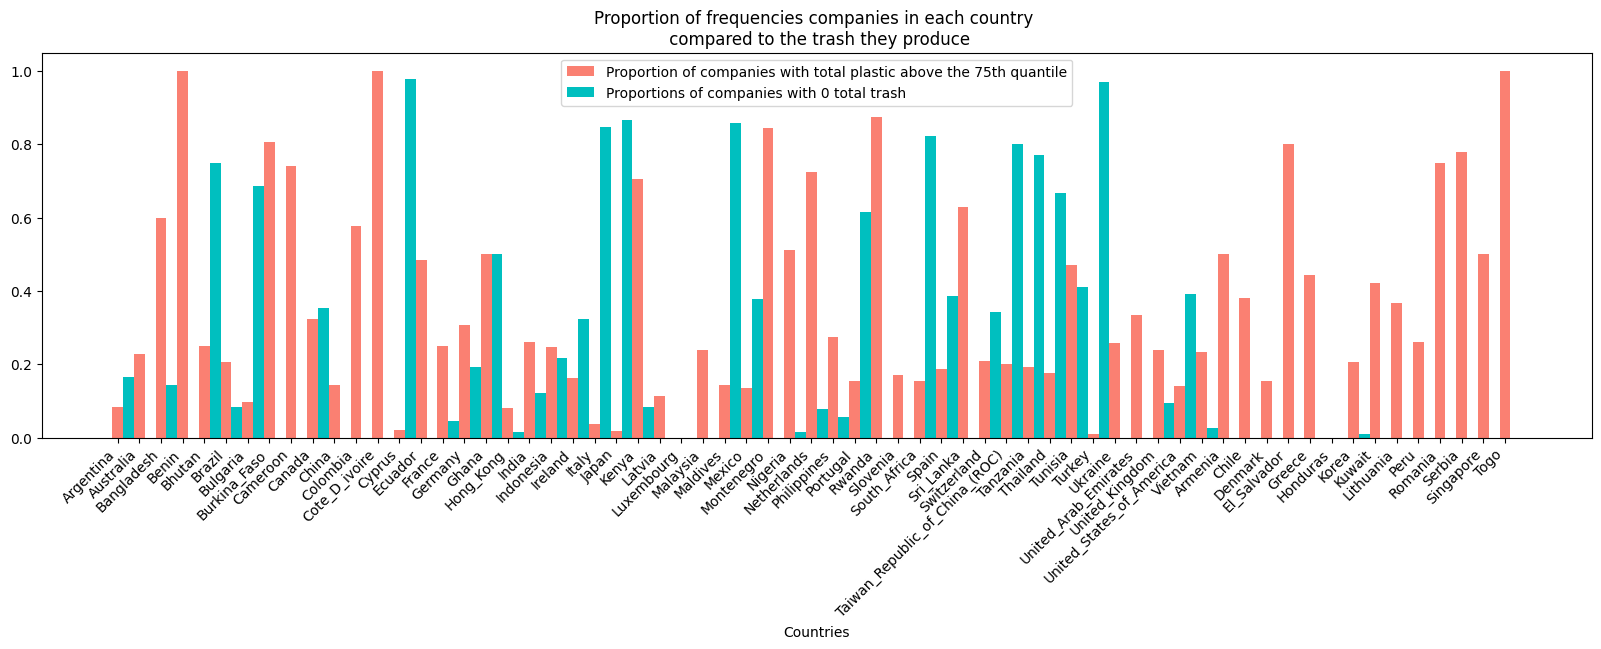

In [ ]:
bar_width = 0.5
index = np.arange(len(countries))

# Creating the bar plot
plt.figure(figsize=(20, 5))
#plt.bar(index, tot_freq, width = bar_width, label='Total frequency')
plt.bar(index, max_props, width=bar_width, label='Proportion of companies with total plastic above the 75th quantile', color = "salmon")
plt.bar(index +bar_width, min_props, width=bar_width, label='Proportions of companies with 0 total trash', color = "c")
# Customizing the plot
plt.xlabel('Countries')
plt.xticks(range(len(countries)), countries, fontsize=10)
plt.xticks(rotation=45, ha="right")
plt.title('Proportion of frequencies companies in each country \n compared to the trash they produce')
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
# hypothesis test: plastic produced in 2019 is not equal to the plastic produced in 2020
# Null: plastic produced in 2019 and 2020 is equal
# alternative: Plastic produced in 2019 is not equal to plastic produced in 2020
plastic_19num = mean_plastic[mean_plastic["year"]== 2019]["grand_total"]
plastic_20num = mean_plastic[mean_plastic["year"]== 2020]["grand_total"]
# What I want to investigate: Unbranded companies plastic production v other companies
# Assumption: Companies that are "Unbranded" will have the highest plastic contribution, due to a lack of accountability
# too investigate this, we will add new columns to our data set

# null hypothesis: grand total plastic for branded and unbranded companies is equal
# alternate hypothesis: grand total plastic for branded and unbranded companies is not equal
t_stat, p_value = stats.ttest_ind(plastic_19num,plastic_20num)
# Display the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -1.5428557618812764
p-value: 0.1228921868617133


Since our p-value after running our hypothesis test is 0.122 with an alpha equal to 0.05, we cannot reject the null that the plastic produced in 2019 differs significantly from that produced in 2020.

Text(0.5, 0, 'Total plastic production')

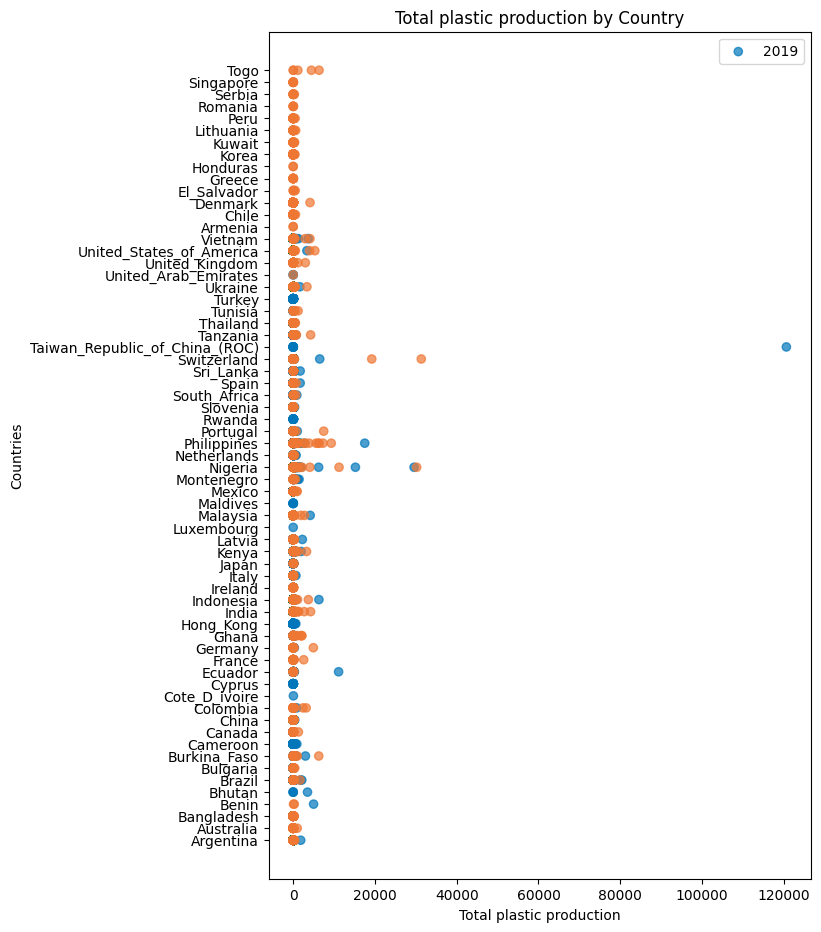

In [ ]:
#Matplot lib challenge (prolly not actually going to include this anywhere, just for the practice)
# add column percent increase to mean plastics (original df)
cats = {}
color7 = ['#0077BB', '#EE7733', '#009988', '#EE7733', '#CC3311', '#EE3377', "#BBBBBB"]
year_cats = list(mean_plastic.year.value_counts().index)
year_cats
for i in range(len(year_cats)):
  cats[year_cats[i]] = color7[i]

mean_plastic['year_color'] = mean_plastic['year'].map(cats)
fig, axs = plt.subplots( figsize=(7,11))
axs.scatter(mean_plastic.grand_total,mean_plastic.country, alpha=0.7, c = mean_plastic.year_color)
axs.legend(["2019"])
axs.set_title("Total plastic production by Country")
axs.set_ylabel("Countries")
axs.set_xlabel("Total plastic production")

In [ ]:
# Number summaries plastic (not grouped by countries )
print(f" 2019 total plastic: {plastic_19.grand_total.sum()}")
print(f" 2019 mean plastic: {plastic_19.grand_total.mean()}")
print(f" 2020 total plastic: {plastic_20.grand_total.sum()}")
print(f" 2020 mean plastic: {plastic_20.grand_total.mean()}")
print(f" 2019-2020 mean plastic: {mean_plastic.grand_total.mean()}")
print(f" 2019-2020 total plastic: {mean_plastic.grand_total.sum()}")
print("-----------------------------------------------------------")
# Number summaries plast (grouped by countries/ not by year)
print(f" 2019 and 2020 total plastic: {plast.grand_total.sum()}")
print(f" 2019 and 2020 mean plastic: {plast.grand_total.mean()}")
print(f" 2019 and 2020 total branded: {plast.branded.sum()}")
print(f" 2019 and 2020 total unbranded: {plast.unbranded.sum()}")
print(f" 2019 and 2020 mean branded: {plast.branded.mean()}")
print(f" 2019 and 2020 mean unbranded: {plast.unbranded.mean()}")
print("-----------------------------------------------------------")
# number summary 2019 without taiwan
plast_2019_2 = plastic_19.copy()
plast_2019_2 = plast_2019_2[plast_2019_2["country"] != "Taiwan_Republic_of_China_(ROC)"]
print(f" 2019 total plastic: {plast_2019_2.grand_total.sum()}")
print(f" 2019 mean plastic: {plast_2019_2.grand_total.mean()}")

 2019 total plastic: 372276.0
 2019 mean plastic: 7299.529411764706
 2020 total plastic: 347334.7369036678
 2020 mean plastic: 6315.177034612142
 2019-2020 mean plastic: 60.05263597627204
 2019-2020 total plastic: 719610.7369036679
-----------------------------------------------------------
 2019 and 2020 total plastic: 719610.7369036678
 2019 and 2020 mean plastic: 11070.934413902582
 2019 and 2020 total branded: 385021.7369036678
 2019 and 2020 total unbranded: 334589.0
 2019 and 2020 mean branded: 5923.411336979505
 2019 and 2020 mean unbranded: 5147.523076923077
-----------------------------------------------------------
 2019 total plastic: 251630.0
 2019 mean plastic: 5032.6


In [ ]:
fig.savefig('scatter_totalplastic.png', dpi=150)

**Employer and task:**
You’re a data scientist at Plastinction, an organization dedicated to research, lobbying, and advocacy for the elimination of plastic waste worldwide. In advance of the company’s annual report, you’re asked to report on the state of global plastic pollution in 2020 and changes from 2019, using audit data generously provided by Break Free from Plastic.


---


**Guiding questions:**  
How is global plastic pollution distributed? Examine this across a variety of factors and levels of aggregation.


---


Are there any interesting or anomalous actors (again, ambiguously defined) who are disproportionately environmentally friendly or harmful? You can (should?) create your own metric for this—try thinking of some different ways you could measure this, using data in this dataset and elsewhere.


---


What notable changes in plastic pollution, broadly defined, are there between 2019 and 2020? Are these changes robust and visible across different levels of aggregation?
